✅ Dataset Loaded
Shape: (13320, 9)
Columns: ['area_type', 'availability', 'location', 'size', 'society', 'total_sqft', 'bath', 'balcony', 'price'] 

Data Types:
 area_type        object
availability     object
location         object
size             object
society          object
total_sqft       object
bath            float64
balcony         float64
price           float64
dtype: object 

Missing values per column:
 area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64 

✅ BHK column created
✅ Categorical columns encoded
Top 10 locations by average price:
 location
Anekal                  16.000000
Banaswadi               35.000000
Basavangudi             50.000000
Bhoganhalli             22.890000
Devarabeesana Halli    124.833333
Devarachikkanahalli     62.714286
Electronic City         23.250000
Mysore Highway          36.875000
Rachen

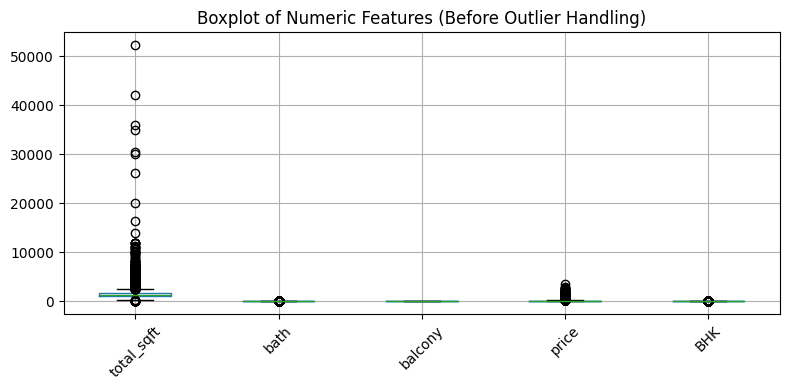

✅ Outliers handled using IQR clipping


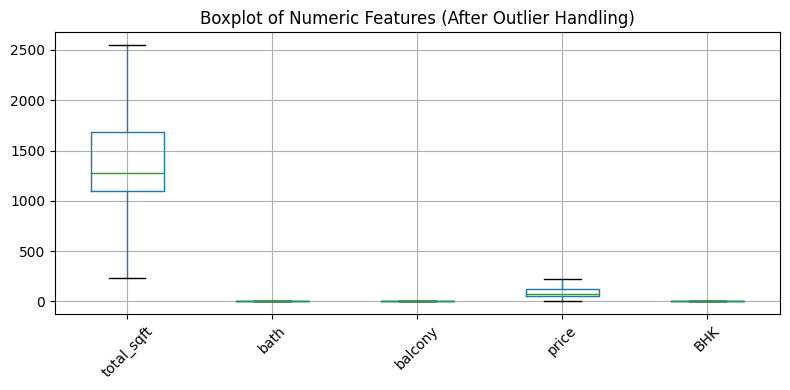

In [1]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Step 2: Load dataset
df = pd.read_csv('Bengaluru_House_Data.csv')
print("✅ Dataset Loaded")
print("Shape:", df.shape)
print("Columns:", df.columns.tolist(), "\n")
print("Data Types:\n", df.dtypes, "\n")

# Step 3: Clean column names
df.columns = df.columns.str.strip().str.lower()
df.columns = [c.replace(" ", "_") for c in df.columns]

# Step 4: Convert total_sqft to numeric
def convert_sqft(val):
    if isinstance(val, str):
        val = val.strip()
        if '-' in val:
            parts = re.findall(r"[\d\.]+", val)
            if len(parts) == 2:
                return (float(parts[0]) + float(parts[1])) / 2
        match = re.search(r"[\d\.]+", val)
        if match:
            return float(match.group())
        return np.nan
    return val

df['total_sqft'] = df['total_sqft'].apply(convert_sqft)

# Step 5: Check missing values
print("Missing values per column:\n", df.isna().sum(), "\n")

# Step 6: Separate numeric and categorical columns
num_cols = df.select_dtypes(include=np.number).columns
cat_cols = df.select_dtypes(exclude=np.number).columns

# Step 7: Fill missing values
df[num_cols] = df[num_cols].apply(lambda s: s.fillna(s.median()))
df[cat_cols] = df[cat_cols].apply(lambda s: s.fillna(s.mode().iloc[0]) if not s.mode().empty else s.fillna('Unknown'))

# Step 8: Extract BHK from 'size' column
df["BHK"] = df["size"].apply(lambda x: int(x.split()[0]))
print("✅ BHK column created")

# Step 9: Encode categorical features
le = LabelEncoder()
df_encoded = df.copy()
for c in cat_cols:
    df_encoded[c] = le.fit_transform(df[c].astype(str))
print("✅ Categorical columns encoded")

# Step 10: Price by location
price_by_location = df.groupby('location')['price'].mean()
print("Top 10 locations by average price:\n", price_by_location.head(10), "\n")

# Step 11: Boxplot for numeric features BEFORE outlier handling
plt.figure(figsize=(8, 4))
df.select_dtypes(include=np.number).boxplot()
plt.title('Boxplot of Numeric Features (Before Outlier Handling)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Step 12: Handle outliers using IQR clipping
for c in df.select_dtypes(include=np.number):
    q1, q3 = df[c].quantile([0.25, 0.75])
    iqr = q3 - q1
    lower, upper = q1 - 1.5*iqr, q3 + 1.5*iqr
    df[c] = df[c].clip(lower, upper)
print("✅ Outliers handled using IQR clipping")

# Step 13: Boxplot AFTER outlier handling
plt.figure(figsize=(8, 4))
df.select_dtypes(include=np.number).boxplot()
plt.title('Boxplot of Numeric Features (After Outlier Handling)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
